# Open SASSIE netcdf granules

In [7]:
import boto3
import s3fs
import fsspec
import xarray as xr
import zarr

## Open ZARR store

In [8]:
salt_path   = 'podaac-dev-sassie/ECCO_model/N1/V1R1/HH/ZARR/SALT_AVG_DAILY.ZARR/'
# siarea_path = 'podaac-dev-sassie/ECCO_model/N1/V1R1/HH/ZARR/SIarea_AVG_DAILY.ZARR/'
# theta_path  = 'podaac-dev-sassie/ECCO_model/N1/V1R1/HH/ZARR/THETA_AVG_DAILY.ZARR/'

In [9]:
def get_aws_credentials(profile_name='sassie_read'):
    session = boto3.Session(profile_name=profile_name)
    credentials = session.get_credentials()
    return credentials

In [10]:
# load sassie profile credentials
aws_credentials = get_aws_credentials(profile_name='sassie_read')
# initialize s3 filesystem
s3_options = dict(anon=False, key=aws_credentials.access_key, secret=aws_credentials.secret_key)

In [11]:
# function to open zarr store with a provided s3 bucket path
def open_zarr_store(s3_path, s3_options):

    # initalize s3 file system
    fs = fsspec.filesystem("s3", asynchronous=True, **s3_options)

    # define location of zarr store and open
    store = zarr.storage.FsspecStore(fs, path=s3_path)
    zarr_store = xr.open_dataset(store, engine='zarr',consolidated=False)
    
    return zarr_store

In [12]:
# open SALT zarr store
SALT_zarr = open_zarr_store(salt_path, s3_options)
SALT_zarr

<xarray.Dataset> Size: 4TB
Dimensions:    (time: 2581, k: 90, j: 1080, i: 1800, k_u: 90, k_p1: 91,
                k_l: 90, nv: 2)
Coordinates: (12/14)
    YC         (j, i) float32 8MB ...
    Zu         (k_u) float32 360B ...
    Zp1        (k_p1) float32 364B ...
  * i          (i) int32 7kB 0 1 2 3 4 5 6 ... 1794 1795 1796 1797 1798 1799
    Zl         (k_l) float32 360B ...
    XC         (j, i) float32 8MB ...
    ...         ...
  * k          (k) int32 360B 0 1 2 3 4 5 6 7 8 9 ... 81 82 83 84 85 86 87 88 89
  * k_u        (k_u) int32 360B 0 1 2 3 4 5 6 7 8 ... 81 82 83 84 85 86 87 88 89
  * k_l        (k_l) int32 360B 0 1 2 3 4 5 6 7 8 ... 81 82 83 84 85 86 87 88 89
  * k_p1       (k_p1) int32 364B 0 1 2 3 4 5 6 7 8 ... 83 84 85 86 87 88 89 90
    time_bnds  (time, nv) datetime64[ns] 41kB ...
  * time       (time) datetime64[ns] 21kB 2014-01-15T12:00:00 ... 2021-02-07T...
Dimensions without coordinates: nv
Data variables:
    SALT       (time, k, j, i) float64 4TB ...
Attributes: (12/55)
    Conventions:                     CF-1.8, ACDD-1.3
    acknowledgement:                 This research was carried out by the Jet...
    author:                          Mike Wood, Marie Zahn, and Ian Fenty
    cdm_data_type:                   Grid
    comment:                         SASSIE llc1080 V1R1 fields are consolida...
    creator_email:                   ecco-group@mit.edu
    ...                              ...
    standard_name_vocabulary:        NetCDF Climate and Forecast (CF) Metadat...
    summary:                         This dataset provides data variable and ...
    time_coverage_end:               2021-02-08T00:00:00
    time_coverage_start:             2014-01-15T00:00:00
    title:                           SASSIE Ocean Model SALT Parameter for th...
    uuid:                            ee3d4cde-1381-11ef-9c99-0604868e061f

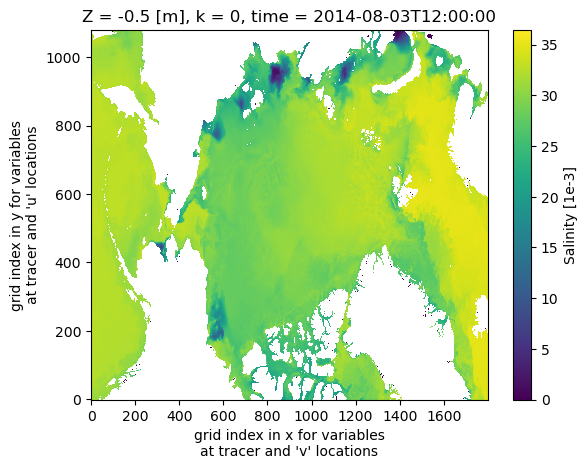

In [25]:
SALT_zarr.SALT.isel(time=200,k=0).plot();

## Open netCDF

In [19]:
# Path to the NetCDF file in S3
file_path = "podaac-dev-sassie/ECCO_model/N1/V1R1/HH/NETCDF_RERUN/SALT_AVG_DAILY/SALT_day_mean_2018-08-17_ECCO_SASSIE_V1_HH_llc1080.nc"

# Load SASSIE profile credentials
aws_credentials = get_aws_credentials(profile_name='sassie_read')

# Initialize S3 filesystem options
s3_options = dict(anon=False, key=aws_credentials.access_key, secret=aws_credentials.secret_key)

# Create S3 filesystem
fs = fsspec.filesystem("s3", **s3_options)

# Open the NetCDF file via xarray
with fs.open(file_path, mode='rb') as f:
    SALT_netcdf = xr.open_dataset(f).load()

SALT_netcdf

<xarray.Dataset> Size: 1GB
Dimensions:    (time: 1, k: 90, j: 1080, i: 1800, k_u: 90, k_l: 90, k_p1: 91,
                nv: 2)
Coordinates: (12/14)
  * time       (time) datetime64[ns] 8B 2018-08-17T12:00:00
  * k          (k) int32 360B 0 1 2 3 4 5 6 7 8 9 ... 81 82 83 84 85 86 87 88 89
  * j          (j) int32 4kB 0 1 2 3 4 5 6 ... 1074 1075 1076 1077 1078 1079
  * i          (i) int32 7kB 0 1 2 3 4 5 6 ... 1794 1795 1796 1797 1798 1799
  * k_u        (k_u) int32 360B 0 1 2 3 4 5 6 7 8 ... 81 82 83 84 85 86 87 88 89
  * k_l        (k_l) int32 360B 0 1 2 3 4 5 6 7 8 ... 81 82 83 84 85 86 87 88 89
    ...         ...
    YC         (j, i) float32 8MB 48.68 48.73 48.78 48.83 ... 63.41 63.37 63.34
    Z          (k) float32 360B -0.5 -1.57 -2.79 ... -6.301e+03 -6.76e+03
    Zu         (k_u) float32 360B -1.0 -2.14 -3.44 ... -6.52e+03 -7e+03
    Zl         (k_l) float32 360B 0.0 -1.0 -2.14 ... -6.082e+03 -6.52e+03
    Zp1        (k_p1) float32 364B 0.0 -1.0 -2.14 ... -6.52e+03 -7e+03
    time_bnds  (time, nv) datetime64[ns] 16B 2018-08-17 2018-08-18
Dimensions without coordinates: nv
Data variables:
    SALT       (time, k, j, i) float64 1GB 31.93 31.89 31.85 ... nan nan nan
Attributes: (12/55)
    acknowledgement:                 This research was carried out by the Jet...
    author:                          Mike Wood, Marie Zahn, and Ian Fenty
    cdm_data_type:                   Grid
    Conventions:                     CF-1.8, ACDD-1.3
    creator_email:                   ecco-group@mit.edu
    creator_institution:             NASA Jet Propulsion Laboratory (JPL)
    ...                              ...
    time_coverage_end:               2018-08-18T00:00:00
    time_coverage_start:             2018-08-17T00:00:00
    title:                           SASSIE Ocean Model SALT Parameter for th...
    uuid:                            669f13dc-661c-11ef-8d62-06398d38d9f3
    comment:                         SASSIE llc1080 V1R1 fields are consolida...
    date_modified:                   2024-08-29T15:36:03

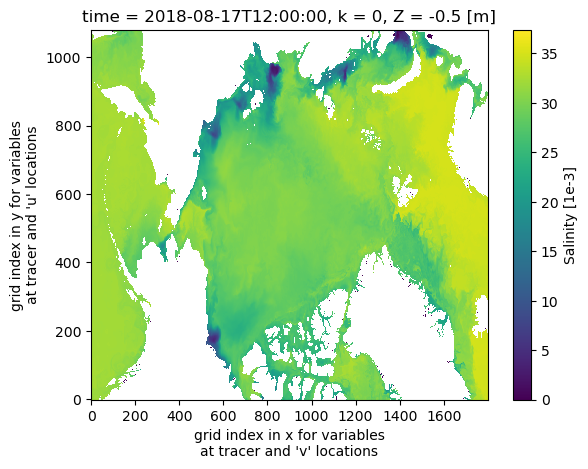

In [24]:
SALT_netcdf.SALT.isel(k=0,time=0).plot();

In [22]:
# this also works - it doesn't load the netCDF into memory (better if you just want to lazily load data file)
SALT_netcdf = xr.open_dataset(f"s3://{file_path}", engine="h5netcdf", backend_kwargs={'storage_options': s3_options})

In [23]:
SALT_netcdf

<xarray.Dataset> Size: 1GB
Dimensions:    (time: 1, k: 90, j: 1080, i: 1800, k_u: 90, k_l: 90, k_p1: 91,
                nv: 2)
Coordinates: (12/14)
  * time       (time) datetime64[ns] 8B 2018-08-17T12:00:00
  * k          (k) int32 360B 0 1 2 3 4 5 6 7 8 9 ... 81 82 83 84 85 86 87 88 89
  * j          (j) int32 4kB 0 1 2 3 4 5 6 ... 1074 1075 1076 1077 1078 1079
  * i          (i) int32 7kB 0 1 2 3 4 5 6 ... 1794 1795 1796 1797 1798 1799
  * k_u        (k_u) int32 360B 0 1 2 3 4 5 6 7 8 ... 81 82 83 84 85 86 87 88 89
  * k_l        (k_l) int32 360B 0 1 2 3 4 5 6 7 8 ... 81 82 83 84 85 86 87 88 89
    ...         ...
    YC         (j, i) float32 8MB ...
    Z          (k) float32 360B ...
    Zu         (k_u) float32 360B ...
    Zl         (k_l) float32 360B ...
    Zp1        (k_p1) float32 364B ...
    time_bnds  (time, nv) datetime64[ns] 16B ...
Dimensions without coordinates: nv
Data variables:
    SALT       (time, k, j, i) float64 1GB ...
Attributes: (12/55)
    acknowledgement:                 This research was carried out by the Jet...
    author:                          Mike Wood, Marie Zahn, and Ian Fenty
    cdm_data_type:                   Grid
    Conventions:                     CF-1.8, ACDD-1.3
    creator_email:                   ecco-group@mit.edu
    creator_institution:             NASA Jet Propulsion Laboratory (JPL)
    ...                              ...
    time_coverage_end:               2018-08-18T00:00:00
    time_coverage_start:             2018-08-17T00:00:00
    title:                           SASSIE Ocean Model SALT Parameter for th...
    uuid:                            669f13dc-661c-11ef-8d62-06398d38d9f3
    comment:                         SASSIE llc1080 V1R1 fields are consolida...
    date_modified:                   2024-08-29T15:36:03